## Pracuj and Careerjet one day 'python scraping' visualizations

In [1]:
import pandas as pd
from datetime import datetime, date
import pickle
import re
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import math
import numpy as np

In [2]:
path = r'../scraping_results/'
df = pd.read_csv(path + 'careerjet_pracuj_django_2023-11-27.csv', index_col=0)
df.sample(5)

,title,link,company,location,salary,description,date_added,skills,search_term,date_searched
20,Senior/Tech Lead Python,careerjet.pl/jobad/pl605a129749122ef2151d629a3...,Saint-Gobain,"Dąbrowa Górnicza, śląskie",NaN,Position description w ramach rozbudowy obe...,NaN,NaN,python,2023-11-27
21,Junior Ruby Developer @ Devire sp. z o.o,careerjet.pl/jobad/pl5d7b1a837570d9f8cc3edc1d1...,Devire sp. z o.o.,"Gdynia, pomorskie",NaN,Knowledge and at least junior experience in: ...,NaN,NaN,python,2023-11-27
33,"Staff Software Engineer (ML/AI) - Europe, Remote",careerjet.pl/jobad/pla0f116077f7a714ccda21026c...,Plentific,Polska,NaN,"Job Description: We're Plentific, the world'...",NaN,NaN,python,2023-11-27
73,Senior Python Developer,https://www.pracuj.pl/praca/senior-python-deve...,NaN,NaN,20 000–23 500 zł netto (+ VAT) / mies.,Projekt wspierający badania kliniczne i niekli...,NaN,"['Python', 'FastAPI', 'Celery', 'pytest', 'SQL...",python,2023-11-27
62,Senior Python Developer,https://www.pracuj.pl/praca/senior-python-deve...,NaN,NaN,150 zł netto (+ VAT) / godz.,Our client is embarking on a groundbreaking pr...,NaN,"['Python', 'AWS']",python,2023-11-27


### Check the count of null values in each Column

In [3]:
null_count = df.isna().sum()
null_count = pd.DataFrame(null_count)
null_count = null_count.T
null_count

,title,link,company,location,salary,description,date_added,skills,search_term,date_searched
0,6,6,44,43,60,9,83,40,0,0


### Analyzing the skills required

In [4]:
skills = df['skills']

#### Drop null values

In [5]:
skills_clean = skills.dropna()

In [6]:
len(skills_clean)

43

In [7]:
skills_clean = pd.DataFrame(skills_clean, columns=['skills'])
skills_clean = skills_clean.reset_index(drop=True)
skills_clean.head()

,skills
0,"['Python', 'JavaScript', 'React.js', 'Redux', ..."
1,"['Python', 'Docker', 'Kubernetes']"
2,"['Python', 'SQL', 'TypeScript', 'Flask', 'Angu..."
3,"['Vue.js', 'JavaScript', 'Python', 'Django', '..."
4,"['Python', 'Java', 'Django', 'Git', 'SQL', 'Po..."


In [8]:
# skills_split = skills_clean.skills.apply(pd.Series)
# skills_split[['skill1','skill2', 'rest']] = pd.DataFrame(skills_clean.skills.tolist())
# skills_split = pd.DataFrame(skills_clean.skills.tolist())
# print(skills_split.head())
# skills_split.rename(columns={0:'skill1', 1:'skill2',
#                                2:'skill3', 3:'skill4',
#                                4:'skill5', 5:'skill6'}, inplace=True)
# skills_split.head()
skills_string = skills_clean['skills'].str.split(',', expand=True)
# skills_string.apply(lambda x: re.sub('[a-zA-Z]+', '', x))
# skills_string = skills_string.replace(r'([a-zA-Z]*)', r'\1', regex=True)
skills_string = skills_string.replace(r'\[', r'', regex=True)
skills_string = skills_string.replace(r'\]', r'', regex=True)
skills_string = skills_string.replace(r"'", r'', regex=True)
skills_string.drop
skills_string.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Python,JavaScript,React.js,Redux,CSS,Git,SQL,Gerrit,Jenkins,Sentry,Btibucket,Grafana,GitHub,Linux,Django
1,Python,Docker,Kubernetes,None,None,None,None,None,None,None,None,None,None,None,None
2,Python,SQL,TypeScript,Flask,Angular,Git,None,None,None,None,None,None,None,None,None
3,Vue.js,JavaScript,Python,Django,AWS,Heroku,PostgreSQL,GitHub,Jira,Confluence,None,None,None,None,None
4,Python,Java,Django,Git,SQL,PostgreSQL,None,None,None,None,None,None,None,None,None


#### Split column cells into separate cells of strings

In [9]:
skills_string = skills_string.loc[:, :6]
skills_string.fillna("", inplace=True)
skills_string.head()

,0,1,2,3,4,5,6
0,Python,JavaScript,React.js,Redux,CSS,Git,SQL
1,Python,Docker,Kubernetes,,,,
2,Python,SQL,TypeScript,Flask,Angular,Git,
3,Vue.js,JavaScript,Python,Django,AWS,Heroku,PostgreSQL
4,Python,Java,Django,Git,SQL,PostgreSQL,


### Get word count of skills by combining them into a single string (not an array) and using the wordcloud library

Text(0.5, 1.0, 'Skills word cloud [python]')

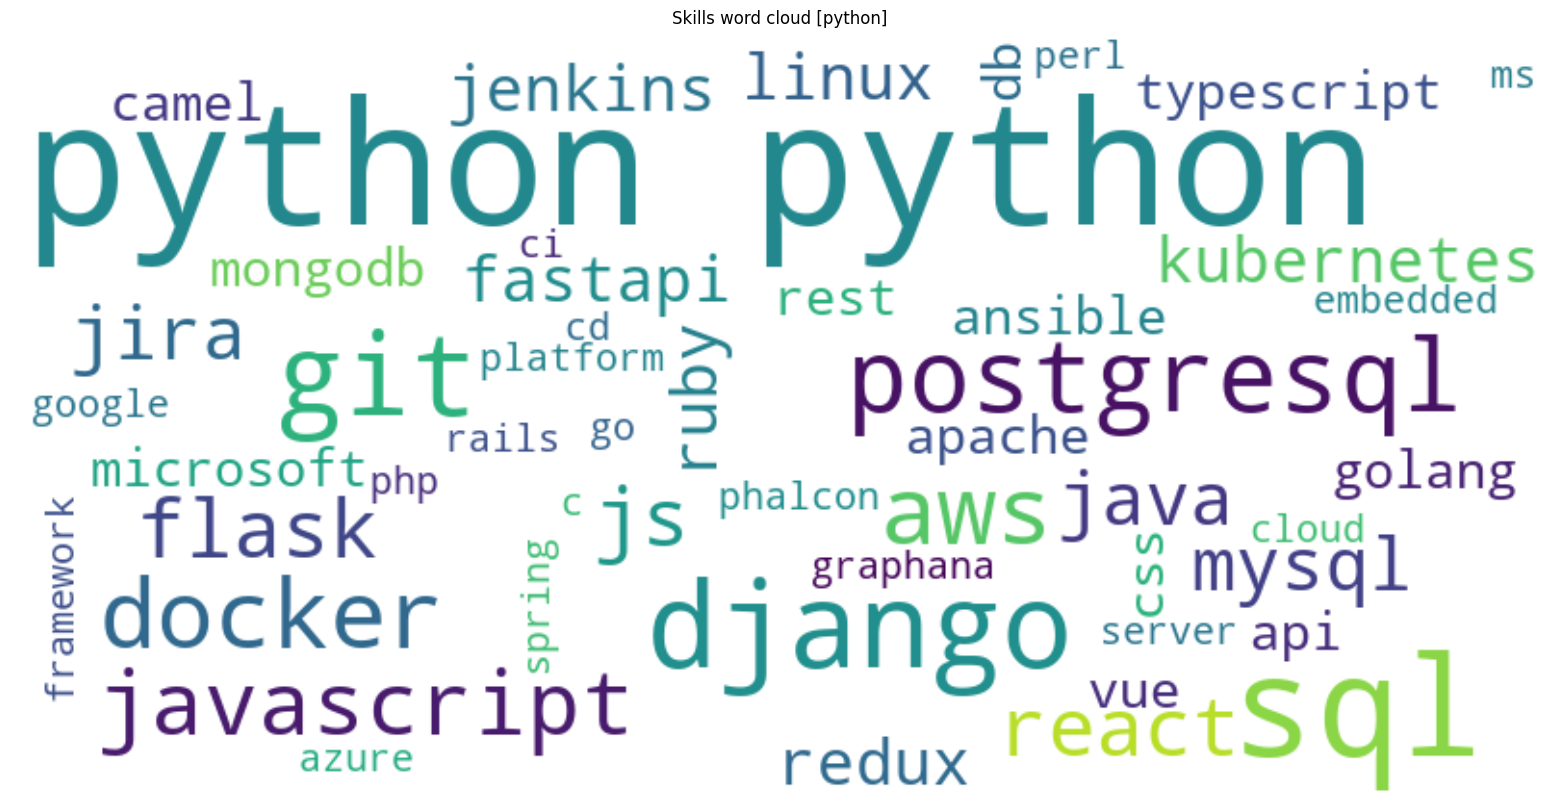

In [10]:
# skills_string['joined'] = skills_string[[0,1,2,3,4,5,6]].agg(', '.join, axis=1)
sum_string = ''
for column in skills_string.columns:
    sum_string += ' '.join(skills_string[column].str.lower())
# skills_string[0]
# skills_string.columns[0]
# skills_string[skills_string.columns[0]]
plt.figure(figsize=(20,10))
wc = WordCloud(background_color="white", stopwords=STOPWORDS, max_words=50,
              width=800, height=400)
wc.generate(sum_string)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Skills word cloud [python]')

Text(0.5, 1.0, 'skills frequency bar chart')

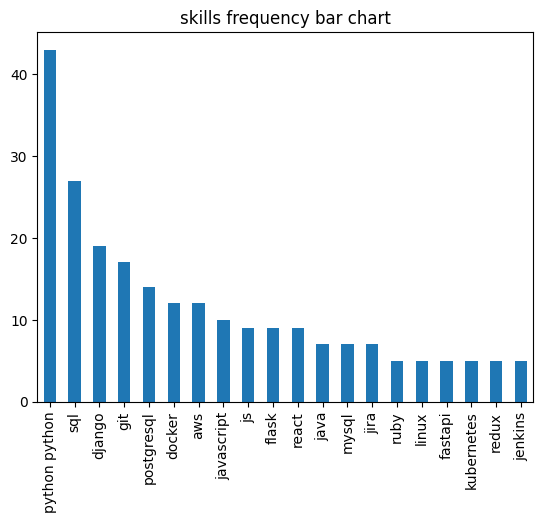

In [11]:
# freq_count_0 =  
# for col in skills_string.columns:
#     freq_count = skills_string[col].values_count()
# words_fc = pd.DataFrame(wc.words_)
words_fc = pd.Series(wc.words_)
words_fc =  np.ceil(words_fc * len(skills_clean))
words_fc[:20].plot.bar()
plt.title('skills frequency bar chart')

Text(0.5, 1.0, 'skills frequency pie chart')

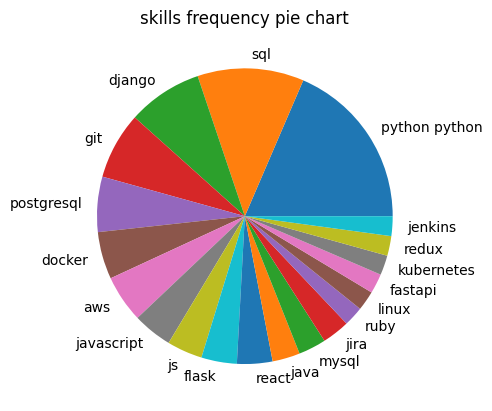

In [12]:
words_fc[:20].plot.pie()
plt.title('skills frequency pie chart')

In [13]:
help(wc)

Help on WordCloud in module wordcloud.wordcloud object:

class WordCloud(builtins.object)
 |  WordCloud(font_path=None, width=400, height=200, margin=2, ranks_only=None, prefer_horizontal=0.9, mask=None, scale=1, color_func=None, max_words=200, min_font_size=4, stopwords=None, random_state=None, background_color='black', max_font_size=None, font_step=1, mode='RGB', relative_scaling='auto', regexp=None, collocations=True, colormap=None, normalize_plurals=True, contour_width=0, contour_color='black', repeat=False, include_numbers=False, min_word_length=0, collocation_threshold=30)
 |  
 |  Word cloud object for generating and drawing.
 |  
 |  Parameters
 |  ----------
 |  font_path : string
 |      Font path to the font that will be used (OTF or TTF).
 |      Defaults to DroidSansMono path on a Linux machine. If you are on
 |      another OS or don't have this font, you need to adjust this path.
 |  
 |  width : int (default=400)
 |      Width of the canvas.
 |  
 |  height : int (defau

### Analyzing the job titles

Text(0.5, 1.0, 'Title word cloud')

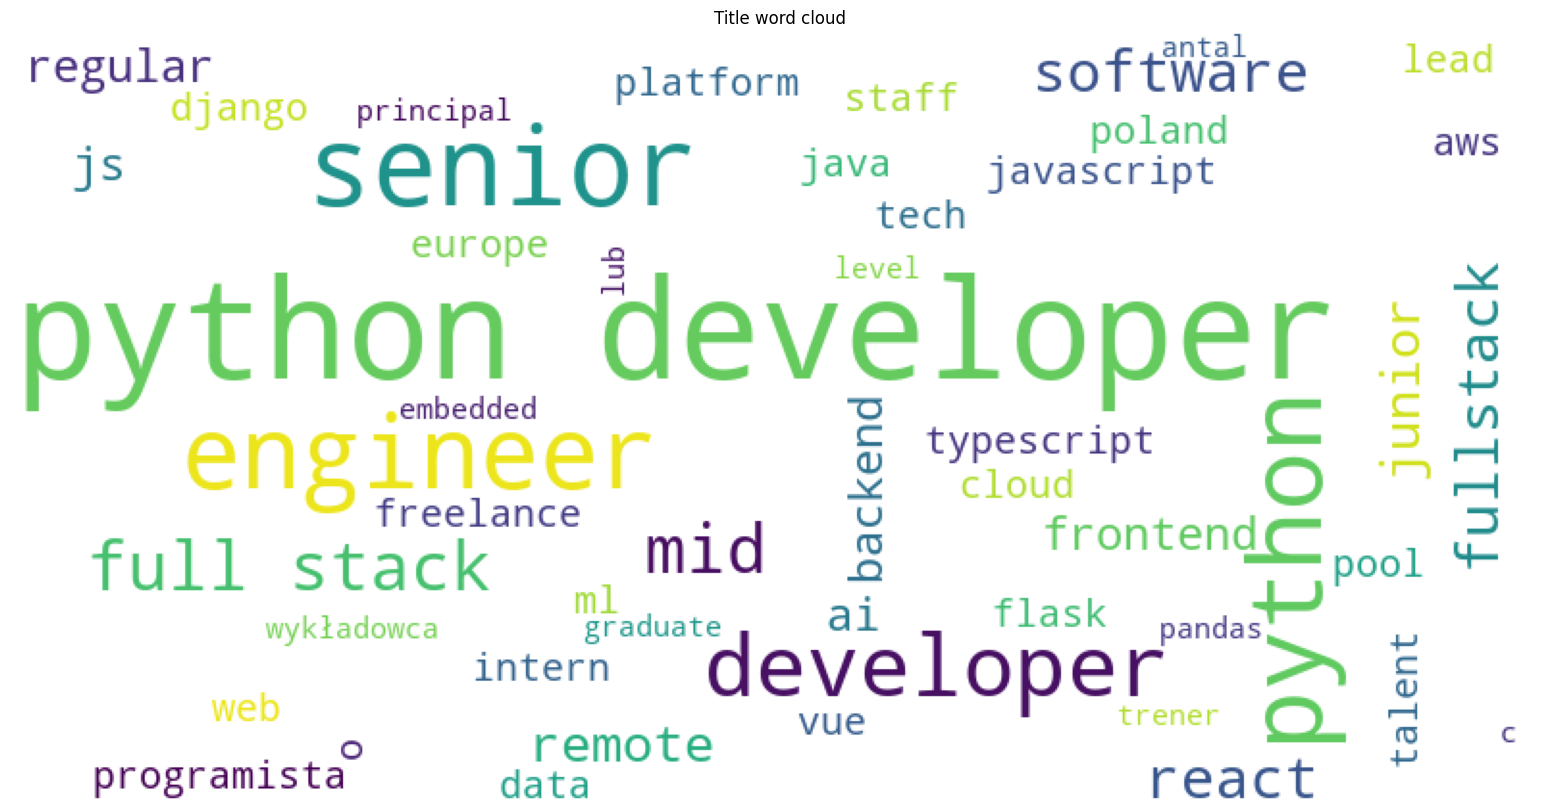

In [14]:
title_clean = df['title'].dropna()
len(title_clean)
title_string = ' '.join(title_clean.str.lower())
plt.figure(figsize=(20,10))
wc_title = WordCloud(background_color="white", stopwords=STOPWORDS, max_words=50,
                    width=800, height=400)
wc_title.generate(title_string)
plt.imshow(wc_title)
plt.axis('off')
plt.title('Title word cloud')

<Axes: >

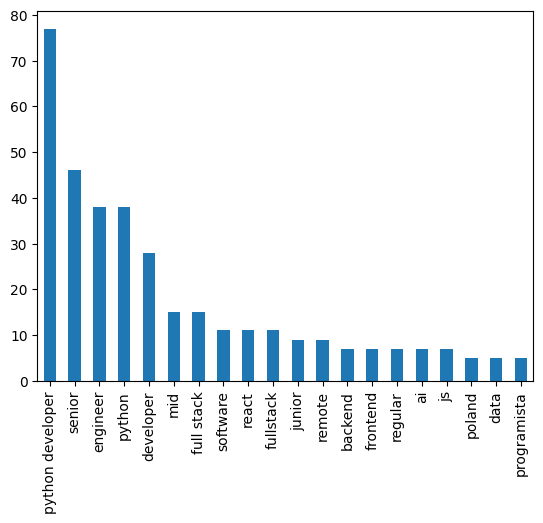

In [15]:
title_fc = pd.Series(wc_title.words_)
title_fc = np.ceil(title_fc * len(title_clean))
title_fc[:20].plot.bar()

### Companies

In [16]:
companies = df['company'].value_counts()
unique_companies = df['company'].unique()
print(companies.head(10))
print(len(unique_companies))

company
Lime Brains          3
10Clouds             2
Payability           2
Veeva Systems        2
OANDA                2
Sunscrapers          2
Plentific            2
Alation              1
Devire sp. z o.o.    1
Zurich               1
Name: count, dtype: int64
32


<Axes: ylabel='count'>

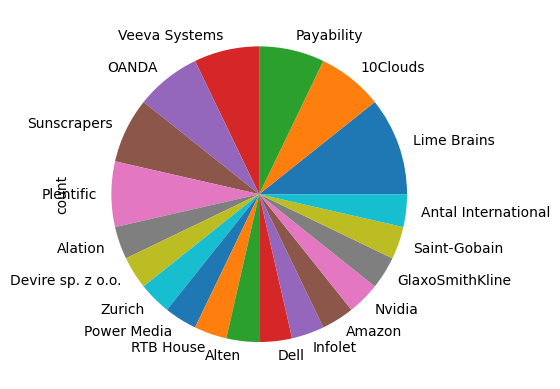

In [17]:
companies[:20].plot.pie()

### Description

74


Text(0.5, 1.0, 'Desc word cloud')

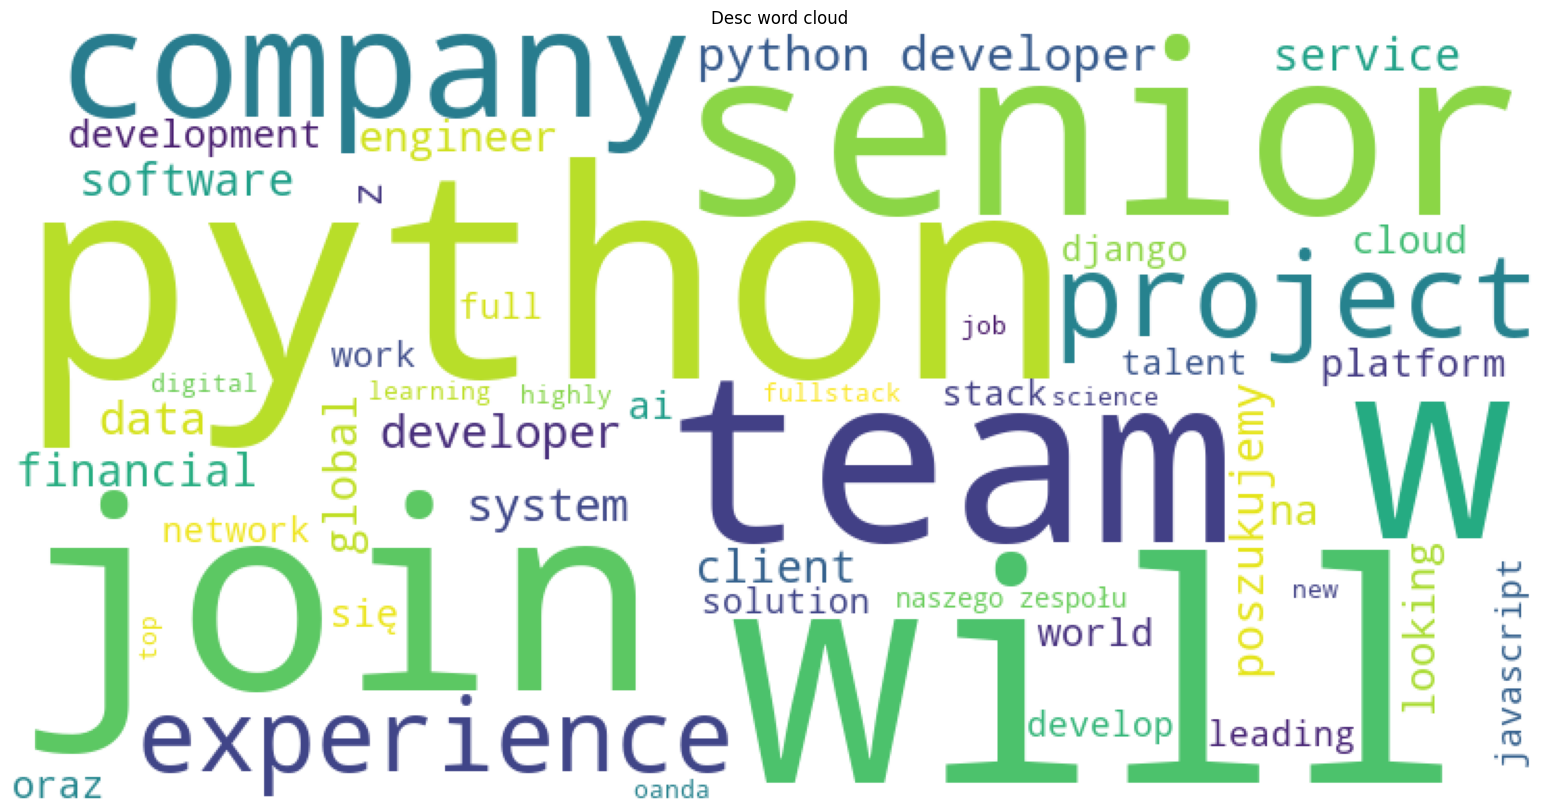

In [18]:
desc_clean = df['description'].dropna()
print(len(desc_clean))
desc_string = ' '.join(desc_clean.str.lower())
plt.figure(figsize=(20,10))
wc_desc = WordCloud(background_color="white", stopwords=STOPWORDS, max_words=50,
                    width=800, height=400)
wc_desc.generate(desc_string)
plt.imshow(wc_desc)
plt.axis('off')
plt.title('Desc word cloud')

### Date?

In [19]:
date_clean = df['date_added'].dropna()
print(len(date_clean))

0


### Location

In [20]:
location_clean = df['location'].dropna()
len(location_clean)

40

In [21]:
location_clean.sample(10)

6           Sienno, mazowieckie
9             Gdynia, pomorskie
1           Kraków, małopolskie
17                       Polska
19        Warszawa, mazowieckie
31        Wrocław, dolnośląskie
20    Dąbrowa Górnicza, śląskie
29        Warszawa, mazowieckie
5         Warszawa, mazowieckie
22        Warszawa, mazowieckie
Name: location, dtype: object

In [22]:
len(location_clean.unique())

10

In [23]:
location_clean.value_counts()

location
Polska                       11
Kraków, małopolskie          10
Warszawa, mazowieckie         9
Gdynia, pomorskie             3
Wrocław, dolnośląskie         2
Poznań, wielkopolskie         1
Sienno, mazowieckie           1
Gdańsk, pomorskie             1
Łódź, łódzkie                 1
Dąbrowa Górnicza, śląskie     1
Name: count, dtype: int64

<Axes: ylabel='count'>

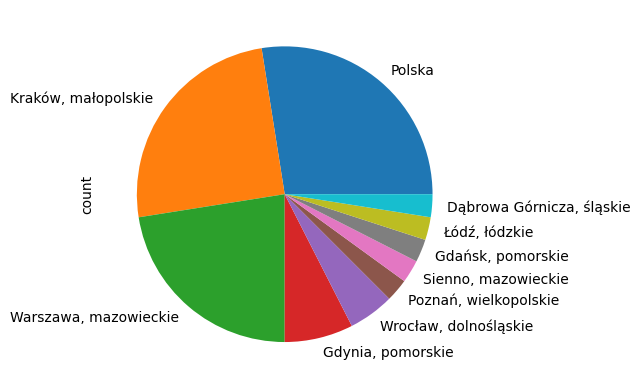

In [24]:
location_clean.value_counts().plot.pie()

### Salary?

In [25]:
salary_clean = df['salary'].dropna()
len(salary_clean)

23

In [26]:
len(salary_clean.unique())

21